In [1]:
import sys
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_theme()

In [2]:
results_folder = 'mmvec_major_taxa'
results_base_name = 'latent_dim_3_input_prior_1.00_output_prior_1.00_beta1_0.90_beta2_0.95'

In [3]:
table = pd.read_table(results_folder + '/' + results_base_name + '_ranks.txt', index_col=0)
table.head()

Propionibacteriaceae  Staphylococcus caprae or capitis  \
featureid                                                           
X940001                0.177989                          0.154912   
X940002                0.006612                         -0.042924   
X940005               -0.029823                         -0.143696   
X940007                0.461745                          0.421363   
X940010                0.408488                          0.030971   

           Staphylococcus epidermidis  Staphylococcus hominis  \
featureid                                                       
X940001                      0.095406                0.012139   
X940002                     -0.242801               -0.026591   
X940005                     -0.292455               -0.234061   
X940007                      0.296187                0.570376   
X940010                      0.778209                0.523698   

           Other Staphylococci  Polyomavirus HPyV6  Polyomavirus HPyV7  \
featureid                                                                
X940001               0.145922            0.043939           -0.043831   
X940002              -0.004430           -0.062433           -0.163995   
X940005               0.057963            0.406687           -0.044387   
X940007               0.372838            0.035342            0.238131   
X940010               0.344422            0.420056            0.744065   

           Merkel Cell Polyomavirus  Malasseziaceae  Corynebacteriaceae  \
featureid                                                                 
X940001                    0.105463        0.016188            0.313228   
X940002                   -0.130395        0.064656           -0.058323   
X940005                   -0.068616        0.037003           -0.125615   
X940007                    0.304312        0.476247            0.427392   
X940010                    0.699084        0.151153            0.408506   

           Micrococcaceae  Other families  
featureid                                  
X940001          0.165941        0.045453  
X940002         -0.115458       -0.112474  
X940005         -0.106984       -0.063329  
X940007          0.348371        0.321372  
X940010          0.632428        0.631959

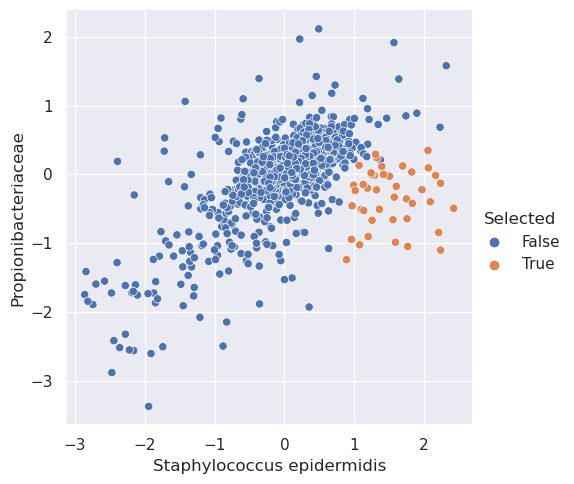

In [4]:
#table['Selected'] = np.logical_and(np.logical_and(table['Propionibacteriaceae']<0.4, table['Staphylococcus epidermidis']>0.8), table['Propionibacteriaceae'] - table['Staphylococcus epidermidis']<-1)
table['Selected'] = np.isin(table.index,
                            ['X940203', 'X940589', 'X940625', 'X940925', 'X940936', 'X942191',
                             'X942237', 'X950023', 'X950028', 'X950056', 'X950157', 'X950173',
                             'X950193', 'X950225', 'X950228', 'X950233', 'X950254', 'X950396',
                             'X950485', 'X950584', 'X950661', 'X950999', 'X960035', 'X960242',
                             'X960306', 'X960421', 'X960463', 'X960465', 'X960712', 'X960726',
                             'X960934', 'X961553', 'X961686', 'X970018', 'X970091', 'X970092',
                             'X970232', 'X970283', 'X970327', 'X970342', 'X970633', 'X970680']
                           )
table.sort_values('Selected', inplace=True)
sns.relplot(
    table,
    y='Propionibacteriaceae', x='Staphylococcus epidermidis', hue='Selected'
)

The three molecular families from version 1 of the manuscript were X950225, X950396, X960242. All three are in the set of Selecteded molecular families from, the new analysis :-)

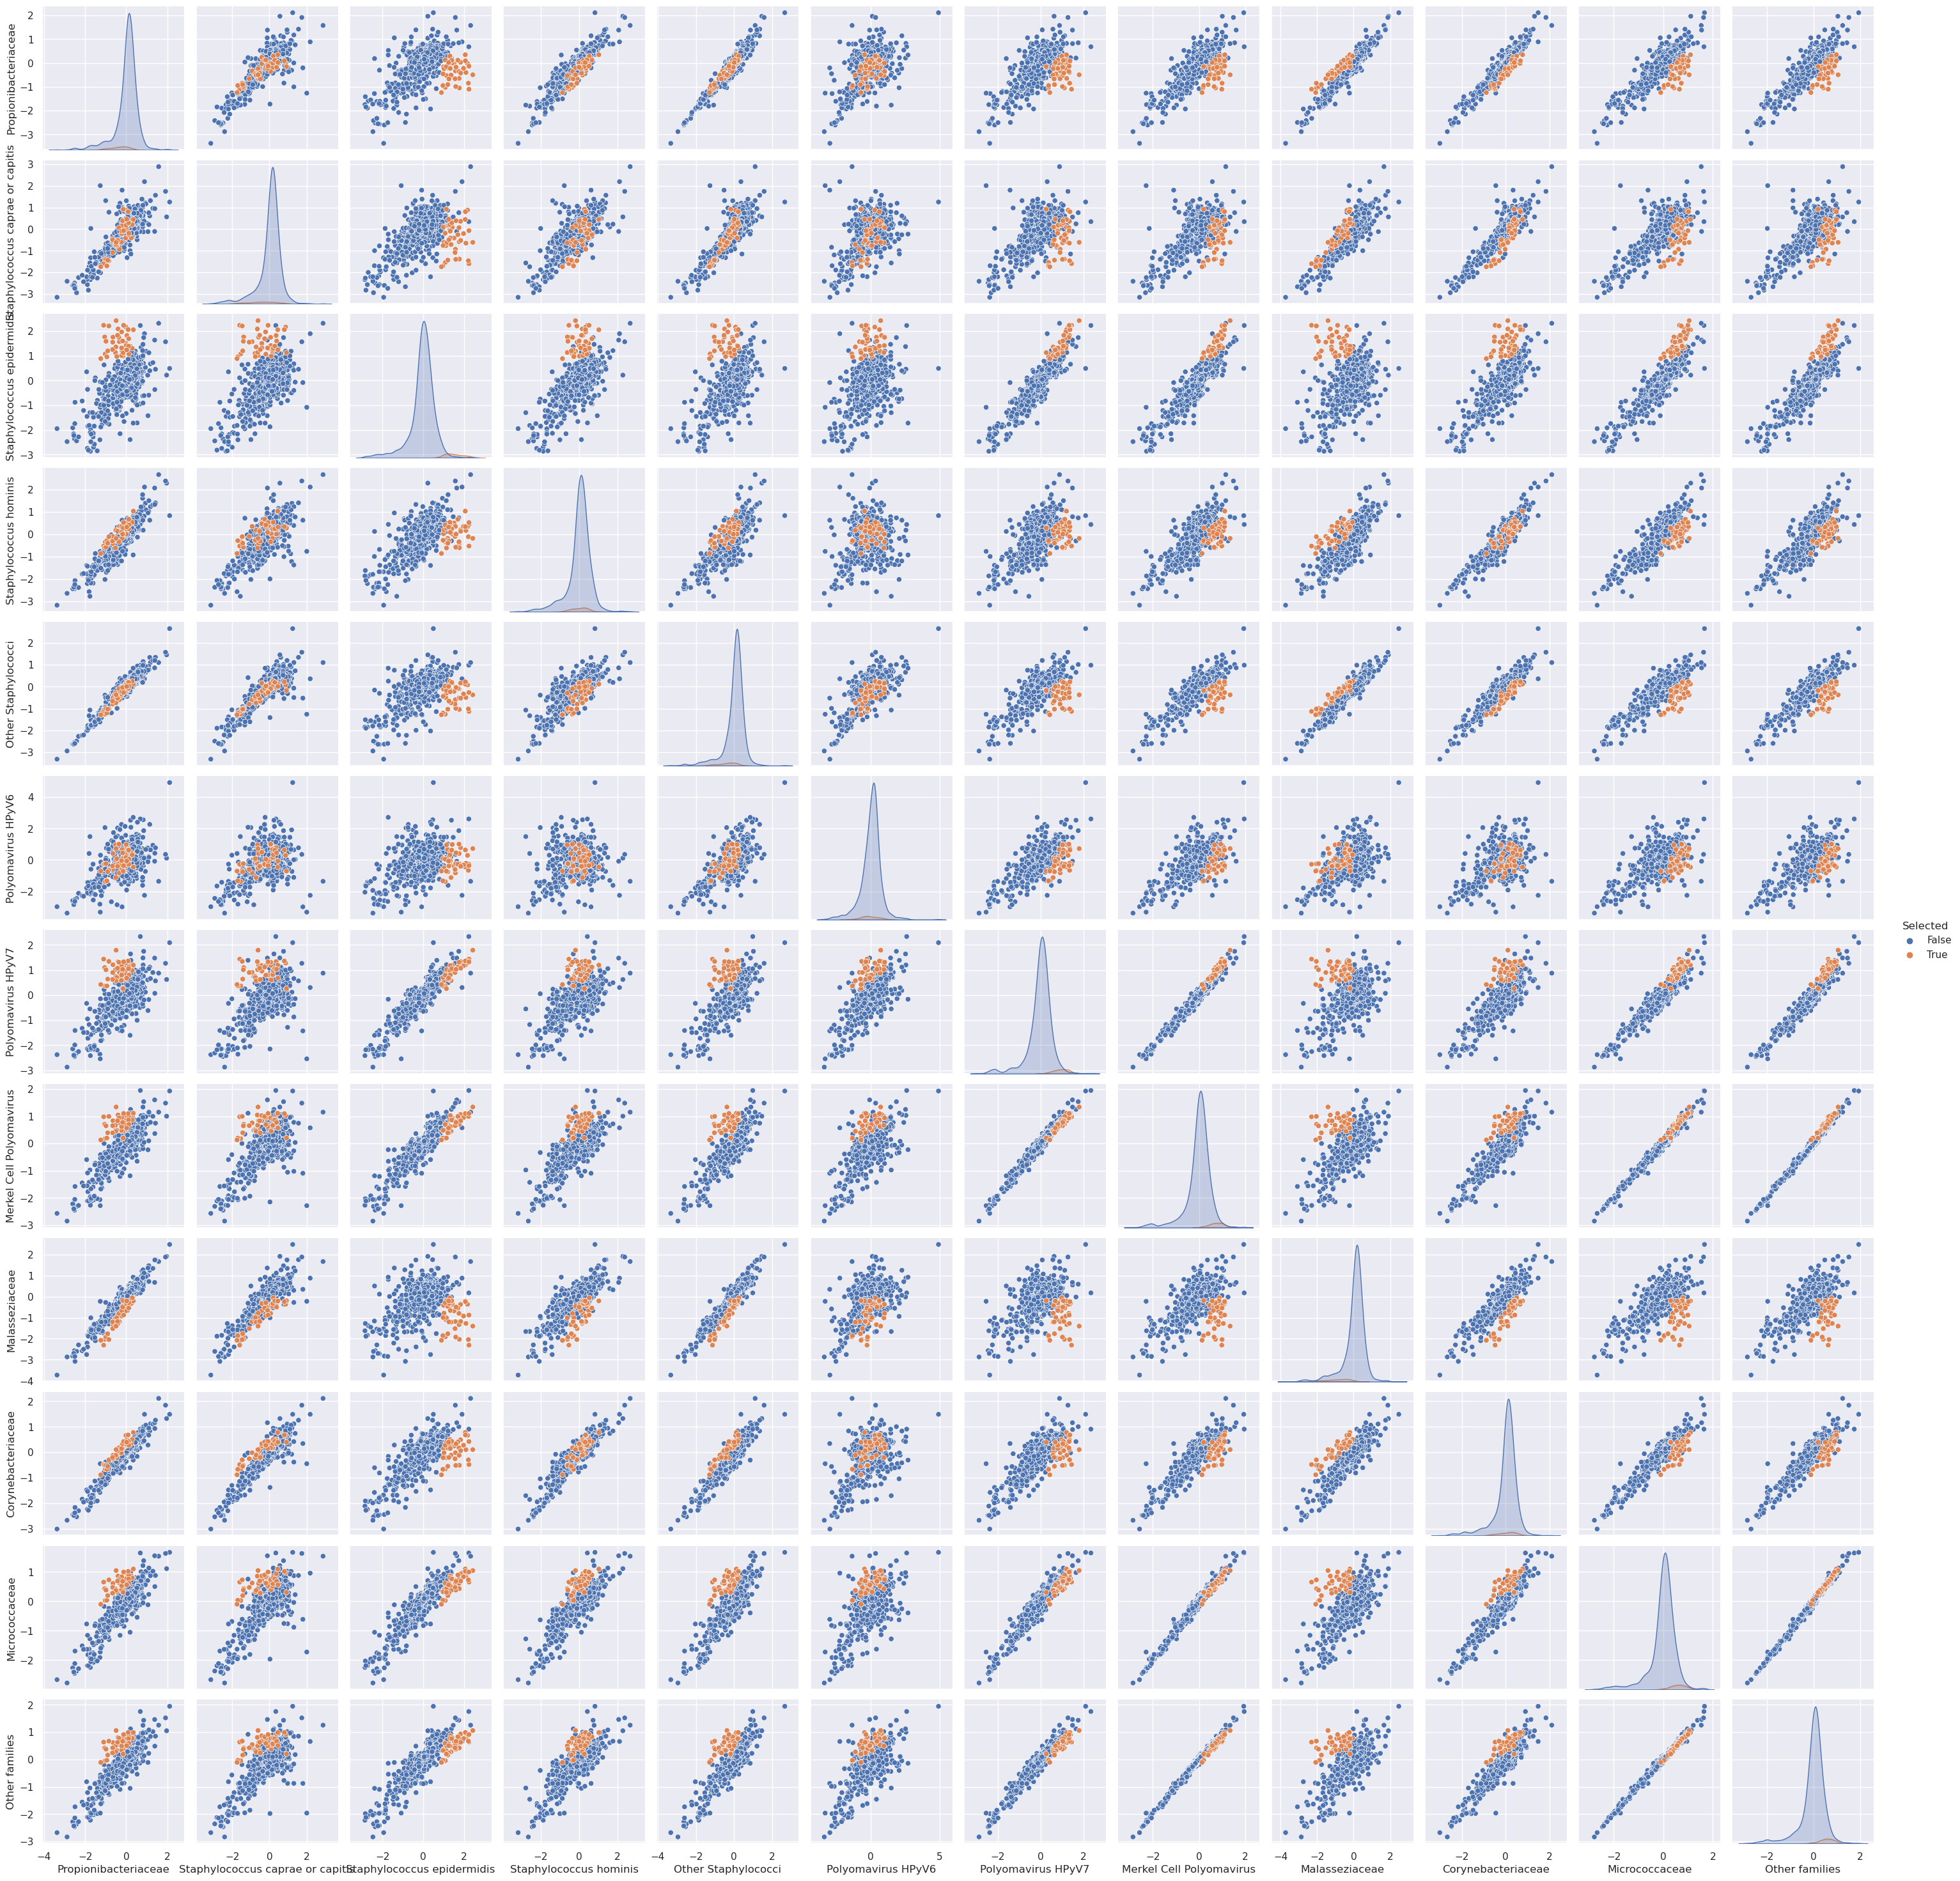

In [5]:
sns.pairplot(table, hue='Selected')

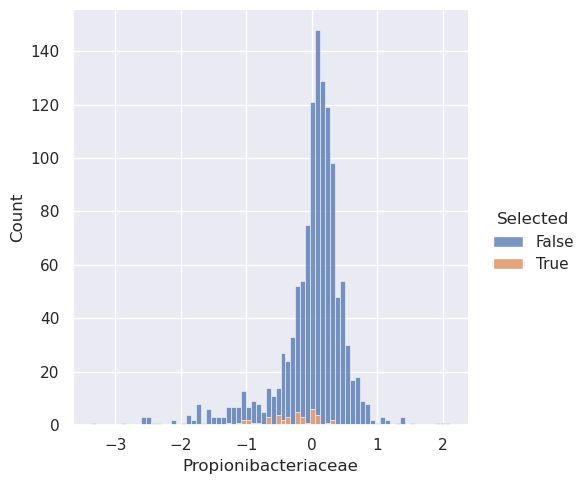

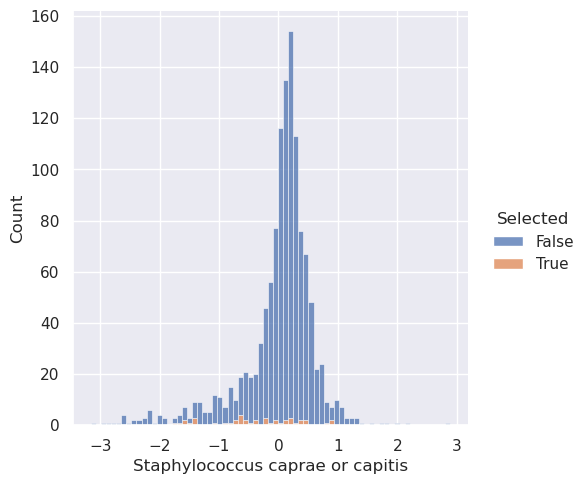

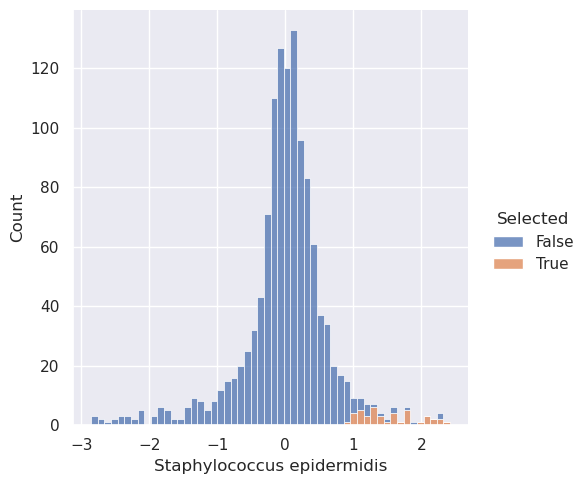

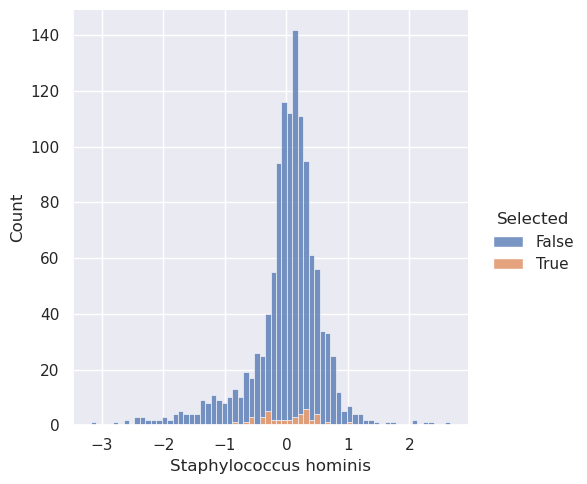

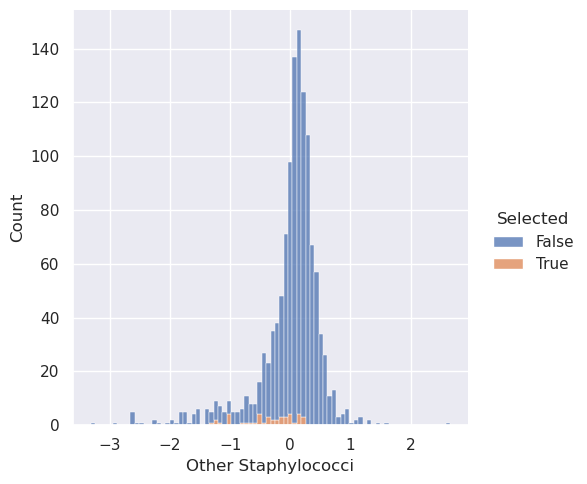

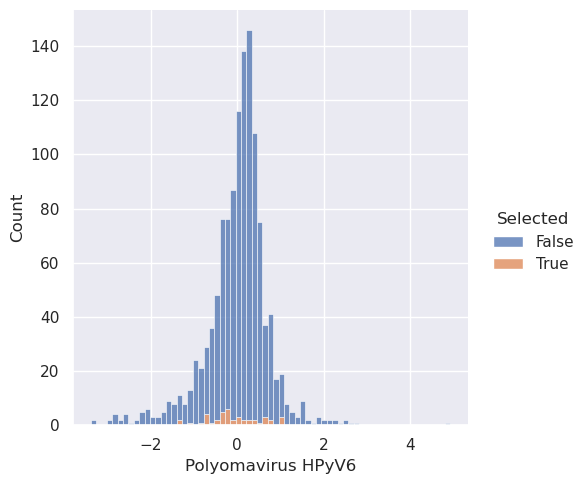

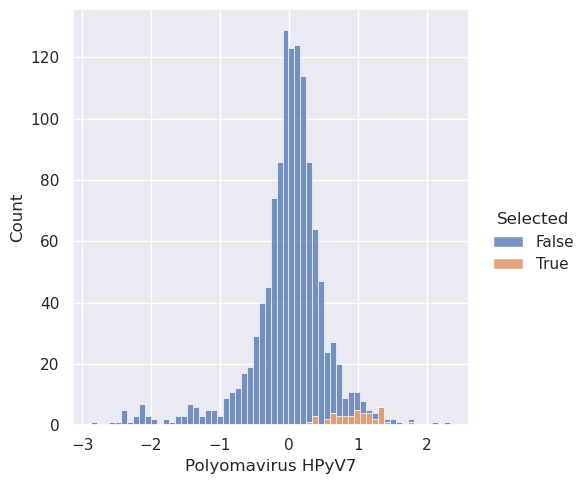

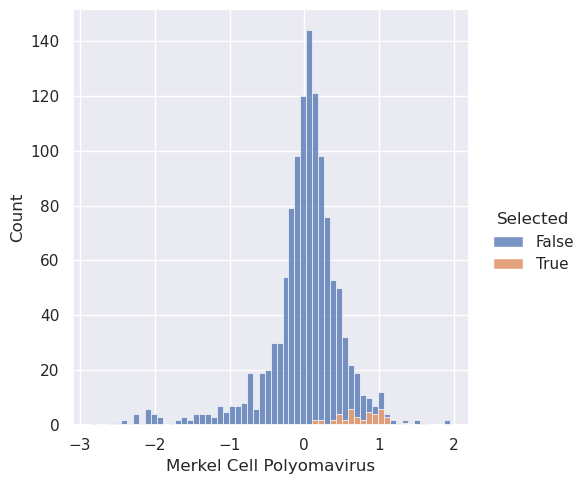

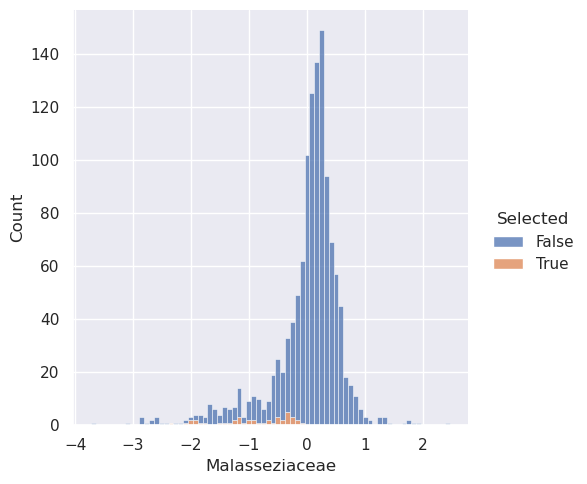

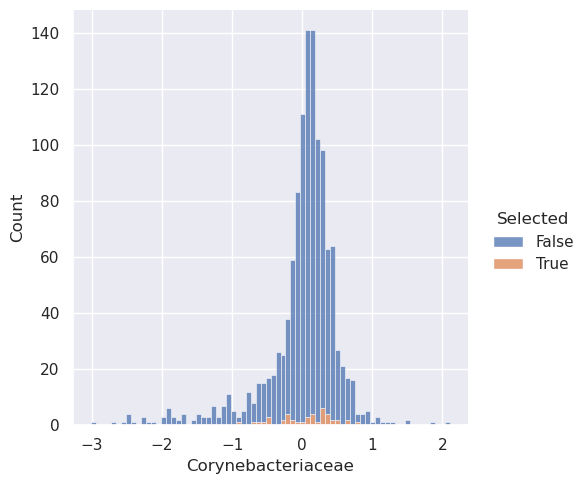

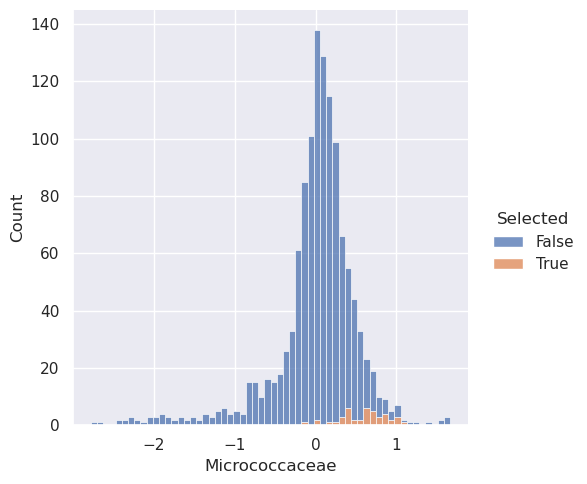

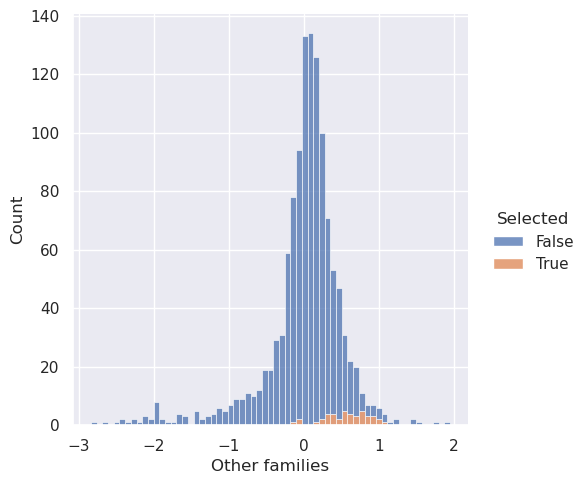

In [6]:
for i in table.columns[:-1]:
    sns.displot(table, x=i, hue='Selected', multiple='stack')